In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

#from jupyterthemes import jtplot

#jtplot.style()

# Data Exploration

- Mean of the integrated profile.
- Standard deviation of the integrated profile.
- Excess kurtosis of the integrated profile.
- Skewness of the integrated profile.
- Mean of the DM-SNR curve.
- Standard deviation of the DM-SNR curve.
- Excess kurtosis of the DM-SNR curve.
- Skewness of the DM-SNR curve.
- Class

## Read datafile

In [2]:
df = pd.read_csv("data/pulsar_stars.csv")

cols = df.columns
ncols = len(cols)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Rename columns to reduce text size

In [3]:
new_cols = ["Mean of the IP",
           "Std. dev. of the IP",
           "Excess kurtosis of the IP",
           "Skewness of the IP",
           "Mean of the DM-SNR",
           "Std. dev. of the DM-SNR",
           "Excess kurtosis of the DM-SNR",
           "Skewness of the DM-SNR",
           "Pulsar"]

df.columns = new_cols

## Statistical info of data

In [5]:
df.describe()

,Mean of the IP,Std. dev. of the IP,Excess kurtosis of the IP,Skewness of the IP,Mean of the DM-SNR,Std. dev. of the DM-SNR,Excess kurtosis of the DM-SNR,Skewness of the DM-SNR,Pulsar
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


## Correlation matrix

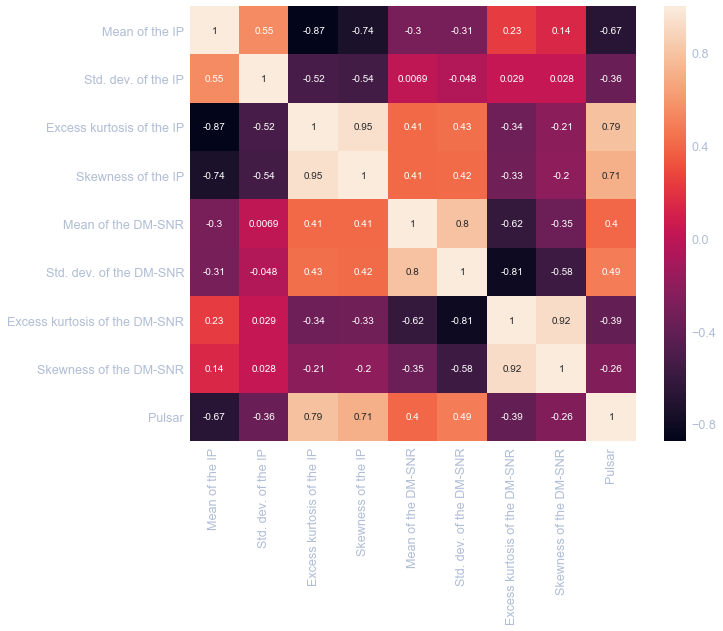

In [6]:
fig = plt.figure(figsize=(10, 8))
sn.heatmap(df.corr(), annot=True)
plt.ylim([9, 0]); plt.xlim([0, 9])
plt.savefig("figures/corr_mat.png", dpi=500)

## Target variables propotion

Text(0.5, 0, 'Pulsar false/true')

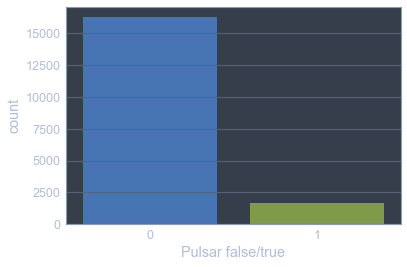

In [12]:
sn.countplot(x = df["Pulsar"])
plt.xlabel("Pulsar false/true")

## Comparing each feature

In [ ]:
sn.pairplot(data=df, hue="Pulsar", palette="husl")
plt.savefig("figures/pairplot.png", dpi=500)

# Preprocessing

## Splitting into features and targets

In [4]:
X = df.loc[:, df.columns != 'Pulsar'].values         # feature matrix
Y = df.loc[:, df.columns == 'Pulsar'].values.ravel() # target vector

## Scaling and splitting the Data

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

XUnscaled = X.copy()
YUnscaled = Y.copy()
X = StandardScaler().fit_transform(X)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=12)

Text(0, 0.5, '')

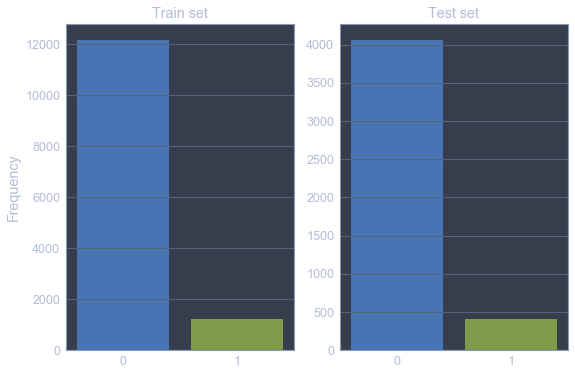

In [6]:
plt.figure(figsize=(9, 6))
plt.subplot(121)
sn.countplot(Ytrain)
plt.title("Train set")
plt.ylabel("Frequency")

plt.subplot(122)
sn.countplot(Ytest)
plt.title("Test set")
plt.ylabel("")

## Fitting Machine Learning models

- Logistic Regression 
- Random Forest Classifier (RFC)
- K-nearest Neighbours (KNN)
- Support Vector Machines (SVM)


### What evaluation metric to use?

As the data set is extremely imbalanced, accuracy score is not a good metric for determining how good the model is. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example. AUC will be used.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
best_models = {"LogReg": (), "RFC": (), "KNN": (), "SVM": ()}

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lambdas = np.logspace(-5, 3, 15) # logreg hyperparameters
param_grid = {'C': lambdas,
             "solver": ["newton-cg", "lbfgs", "sag","saga"],
             "max_iter": [100, 200, 400, 600, 800, 1000]}

logreg = LogisticRegression()

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, param_grid, cv=5, scoring="roc_auc", refit="roc_auc")

# train all models
model = clf.fit(Xtrain, Ytrain)

# save result to dataframe
results = pd.DataFrame.from_dict(model.cv_results_)
results.to_csv("results/logreg")

# store the best model
best_models["LogReg"] = model.best_estimator_

# display results sorted by best scorer
results.sort_values(by="rank_test_score")

# executed in 4m 10s, finished 11:13:41 2019-12-11

C:\Users\caspa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\caspa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\caspa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\caspa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\caspa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\caspa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\caspa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\caspa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\caspa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\caspa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
219,0.322634,0.013683,0.002198,3.956172e-04,1.3895,100,saga,"{'C': 1.389495494373136, 'max_iter': 100, 'sol...",0.975966,0.983036,0.976665,0.967266,0.977831,0.976153,0.005088,1
223,0.512806,0.053016,0.002394,8.036776e-04,1.3895,200,saga,"{'C': 1.389495494373136, 'max_iter': 200, 'sol...",0.976035,0.982966,0.976585,0.967148,0.977901,0.976127,0.005114,2
227,0.569008,0.155856,0.004192,2.933069e-03,1.3895,400,saga,"{'C': 1.389495494373136, 'max_iter': 400, 'sol...",0.976030,0.982966,0.976585,0.967148,0.977901,0.976126,0.005114,3
235,0.547506,0.040758,0.002195,4.041004e-04,1.3895,800,saga,"{'C': 1.389495494373136, 'max_iter': 800, 'sol...",0.976030,0.982966,0.976585,0.967148,0.977901,0.976126,0.005114,3
231,0.565926,0.092987,0.001985,1.821555e-05,1.3895,600,saga,"{'C': 1.389495494373136, 'max_iter': 600, 'sol...",0.976030,0.982966,0.976585,0.967148,0.977901,0.976126,0.005114,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.041598,0.002245,0.002603,4.893207e-04,1e-05,600,saga,"{'C': 1e-05, 'max_iter': 600, 'solver': 'saga'}",0.959460,0.968951,0.966091,0.956932,0.959845,0.962256,0.004506,355
11,0.042998,0.012539,0.003001,8.920174e-04,1e-05,400,saga,"{'C': 1e-05, 'max_iter': 400, 'solver': 'saga'}",0.959458,0.968950,0.966090,0.956935,0.959845,0.962256,0.004505,357
23,0.041597,0.016183,0.002002,6.217196e-07,1e-05,1000,saga,"{'C': 1e-05, 'max_iter': 1000, 'solver': 'saga'}",0.959460,0.968950,0.966090,0.956934,0.959845,0.962256,0.004505,358
22,0.033398,0.004128,0.001801,3.999715e-04,1e-05,1000,sag,"{'C': 1e-05, 'max_iter': 1000, 'solver': 'sag'}",0.959456,0.968953,0.966090,0.956930,0.959845,0.962255,0.004507,359


## Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rfc = RandomForestClassifier()
param_grid = {'n_estimators': (10, 30, 50, 100), 
              'max_features': (2, 4, 6, 8),
              "max_depth": (5, 10, 20, 40, 80, None)}

clf = GridSearchCV(rfc, param_grid, cv=5, scoring="roc_auc", refit="roc_auc")

# train all models
model = clf.fit(Xtrain, Ytrain)

# save result to dataframe
results = pd.DataFrame.from_dict(model.cv_results_)
results.to_csv("results/randomforest")

# store the best model
best_models["RFC"] = model.best_estimator_

# display results sorted by best scorer
results.sort_values(by="rank_test_score")

# executed in 19m 50s, finished 11:35:18 2019-12-11

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,3.590640,0.113843,0.044010,0.001653,10,4,100,"{'max_depth': 10, 'max_features': 4, 'n_estima...",0.974258,0.982576,0.979956,0.976155,0.975812,0.977751,0.003055,1
15,4.094703,0.119651,0.034205,0.002458,5,8,100,"{'max_depth': 5, 'max_features': 8, 'n_estimat...",0.971266,0.983686,0.977796,0.976563,0.979371,0.977736,0.004033,2
29,3.327704,0.274077,0.023805,0.006018,10,8,30,"{'max_depth': 10, 'max_features': 8, 'n_estima...",0.973847,0.983764,0.978432,0.976401,0.975814,0.977652,0.003388,3
10,3.005552,0.107934,0.034404,0.003885,5,6,50,"{'max_depth': 5, 'max_features': 6, 'n_estimat...",0.970235,0.983642,0.979173,0.976949,0.977052,0.977410,0.004331,4
31,8.569868,1.825865,0.094514,0.106596,10,8,100,"{'max_depth': 10, 'max_features': 8, 'n_estima...",0.974906,0.982728,0.976895,0.977219,0.975253,0.977400,0.002811,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0.997793,0.248120,0.010411,0.003712,20,8,10,"{'max_depth': 20, 'max_features': 8, 'n_estima...",0.941662,0.961288,0.961560,0.955176,0.959829,0.955903,0.007481,92
80,0.211007,0.007134,0.006604,0.000472,None,2,10,"{'max_depth': None, 'max_features': 2, 'n_esti...",0.947015,0.961490,0.965472,0.957556,0.946713,0.955650,0.007598,93
76,0.708996,0.031547,0.006408,0.000499,80,8,10,"{'max_depth': 80, 'max_features': 8, 'n_estima...",0.944074,0.963600,0.964155,0.954544,0.949801,0.955235,0.007800,94
72,0.528222,0.020874,0.006400,0.000488,80,6,10,"{'max_depth': 80, 'max_features': 6, 'n_estima...",0.936899,0.964158,0.963195,0.958522,0.947474,0.954050,0.010424,95


## K-nearest neighbours

Pros:

- Very simple
- Training is trivial
- Works with any number of classes
- Easy to add more data
- Few parameters ○ K ○ Distance Metric

Cons:

- High Prediction Cost (worse for large data sets)
- Not good with high dimensional data
- Categorical Features don’t work well

https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()


param_grid = {"n_neighbors": np.arange(1, int(np.sqrt(len(Xtrain))), 3),
              "weights": ["uniform", "distance"],
              "metric": ["euclidean", "manhattan"],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}

clf = GridSearchCV(knn, param_grid, cv=5, scoring="roc_auc", refit="roc_auc")

# train all models
model = clf.fit(Xtrain, Ytrain)

# save result to dataframe
results = pd.DataFrame.from_dict(model.cv_results_)
results.to_csv("results/knn")

# store the best model
best_models["KNN"] = model.best_estimator_

# display results sorted by best scorer
results.sort_values(by="rank_test_score")

# executed in 18m 22s, finished 12:02:31 2019-12-11

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
605,0.001802,0.000400,0.720401,0.016066,brute,manhattan,109,distance,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.966953,0.978921,0.975414,0.971123,0.961614,0.970806,0.006108,1
453,0.009195,0.002394,0.200024,0.011298,kd_tree,manhattan,109,distance,"{'algorithm': 'kd_tree', 'metric': 'manhattan'...",0.966953,0.978921,0.975414,0.971123,0.961614,0.970806,0.006108,1
301,0.008197,0.000979,0.389798,0.025027,ball_tree,manhattan,109,distance,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",0.966953,0.978921,0.975414,0.971123,0.961614,0.970806,0.006108,1
149,0.008390,0.001022,0.207612,0.007522,auto,manhattan,109,distance,"{'algorithm': 'auto', 'metric': 'manhattan', '...",0.966953,0.978921,0.975414,0.971123,0.961614,0.970806,0.006108,1
601,0.001400,0.000490,0.719040,0.011869,brute,manhattan,103,distance,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.966969,0.978995,0.975765,0.971505,0.960203,0.970688,0.006621,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,0.001198,0.000402,0.411400,0.019481,brute,manhattan,1,uniform,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.893829,0.911319,0.909492,0.908276,0.909899,0.906563,0.006441,601
77,0.007993,0.000888,0.042204,0.003060,auto,manhattan,1,distance,"{'algorithm': 'auto', 'metric': 'manhattan', '...",0.893829,0.911319,0.909492,0.908276,0.909899,0.906563,0.006441,601
76,0.008413,0.000826,0.043590,0.003139,auto,manhattan,1,uniform,"{'algorithm': 'auto', 'metric': 'manhattan', '...",0.893829,0.911319,0.909492,0.908276,0.909899,0.906563,0.006441,601
533,0.001902,0.000497,0.402222,0.002779,brute,manhattan,1,distance,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.893829,0.911319,0.909492,0.908276,0.909899,0.906563,0.006441,601


## Support Vector Machines

Advantages
- SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

Disadvantages
- SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

In [13]:
from sklearn.svm import SVC

In [14]:
param_grid = {'C': np.logspace(-4, 1, 10), 
              'gamma' : np.logspace(-2, 1, 10),
             "kernel": ["linear", "poly", "rbf"]}

svc = SVC()

clf = GridSearchCV(svc, param_grid, cv=5, scoring="roc_auc", refit="roc_auc")

# train all models
model = clf.fit(Xtrain, Ytrain)

# save result to dataframe
results = pd.DataFrame.from_dict(model.cv_results_)
results.to_csv("results/svm")

# store the best model
best_models["SVM"] = model.best_estimator_

# display results sorted by best scorer
results.sort_values(by="rank_test_score")

KeyboardInterrupt: 

## Neural Network

In [21]:
import pickle

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras import regularizers

import talos
from talos.model.normalizers import lr_normalizer
from talos.utils import hidden_layers
from talos.metrics.keras_metrics import matthews, precision, recall

from sklearn.preprocessing import OneHotEncoder

from sklearn.utils import class_weight

- Data is not linearly separable, so hidden layers should be used
- Sigmoid used as output activation since we only have a binary classification case
- As one experiment may include more than one optimizer, and optimizers generally have default learning rates in different order of magnitudes, lr_normalizer can be used to allow simultanously including different optimizers and different degrees of learning rates into the Talos experiment. https://autonomio.github.io/talos/#/Learning_Rate_Normalizer
- Dropout is easily implemented by randomly selecting nodes to be dropped-out with a given probability (e.g. 20%) each weight update cycle. This is how Dropout is implemented in Keras. Dropout is only used during the training of a model and is not used when evaluating the skill of the model.

In [114]:
# test model

def test_model():
    model = Sequential() # initialize network
    
    # inout layer
    model.add(Dense(6, input_dim=Xtrain.shape[1],
                    activation="relu",
                   ))
    
    # output layer
    model.add(Dense(1, activation="sigmoid"))
    # train model
    model.compile(loss="binary_crossentropy",
                  optimizer="Adam",
                  metrics=[matthews, precision, recall])
    
    result = model.fit(Xtrain, Ytrain, 
                        validation_data=[Xtest, Ytest],
                        batch_size=64,
                        epochs=100,
                        verbose=0)
    for key in result.history:
        print(key, result.history[key][-1])
test_model()

val_loss 0.0691455272503988
val_matthews 0.8763601779937744
val_precision 0.9484570026397705
val_recall 0.8358265161514282
loss 0.06719258536744879
matthews 0.8582481
precision 0.9222674
recall 0.8266748


### Hyperparameter tuning with Talos

In [72]:
# compute balanced class weights
class_weights = class_weight.compute_class_weight("balanced", [0, 1], Y)
class_weights = {0 : class_weights[0], 1 : class_weights[1]}


def find_best_neuralnet(Xtrain, Ytrain, Xtest, Ytest, params):
    """ Find best hyperparameters for the Keras Dense Neural Network

    params: dictionairy with all relevant hyperparameters to tune
    params = {"first_neuron",
              "learning_rate",
              "epochs",
              "batch_size",
              "dropout",
              "kernel_initializer",
              "hidden_layers",
              "activations",
              "class_weight"}
        """

    
    model = Sequential() # initialize network
    
    # inout layer
    model.add(Dense(params['first_neuron'], input_dim=Xtrain.shape[1],
                    activation=params['activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    # add first hidden layers
    model.add(Dense(params['first_hidden_layer'],
                    activation=params['activation'],
                    kernel_initializer=params['kernel_initializer']))
    # add second hidden layers    
    model.add(Dense(params["second_hidden_layer"],
                    activation=params['activation'],
                    kernel_initializer=params['kernel_initializer']))
    # output layer
    model.add(Dense(1, activation="sigmoid",
                    kernel_initializer=params['kernel_initializer']))
    # train model
    model.compile(loss="binary_crossentropy",
                  optimizer=params['optimizer'](lr=lr_normalizer(params['learning_rate'],params['optimizer'])),
                  metrics=[matthews, precision, recall])
    
    result = model.fit(Xtrain, Ytrain, 
                        validation_data=[Xtest, Ytest],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        class_weight=params["class_weight"],
                        verbose=0)
    
    return result, model   

#### 1st. Experiment

In [17]:
params = {"first_neuron": [4, 6],
          "learning_rate": [0.1, 1, 10],
          "epochs": [50, 200],
          "batch_size": [64, 512],
          "dropout": [0, 0.2],
          "kernel_initializer": ["he_normal", "normal"],
          "first_hidden_layer": [4, 6],
          "second_hidden_layer": [2, 6],
          "activation": ["relu", "elu"],
          "optimizer": [Adam, RMSprop],
          "class_weight": [None, class_weights]}

scan_result = talos.Scan(Xtrain, Ytrain, model=find_best_neuralnet, params=params, fraction_limit=0.1, experiment_name="1")
file = open("exp_1_scan_new.obj", "wb")
pickle.dump(scan_result, file)

result_df = scan_result.data
result_df.to_csv("exp_1_scan.csv")



  0%|                                                                                          | 0/307 [00:00<?, ?it/s]

  0%|▎                                                                               | 1/307 [00:24<2:05:24, 24.59s/it]

  1%|▌                                                                               | 2/307 [01:55<3:46:26, 44.55s/it]

  1%|▊                                                                               | 3/307 [03:27<4:57:21, 58.69s/it]

  1%|█                                                                               | 4/307 [03:49<4:00:47, 47.68s/it]

  2%|█▎                                                                              | 5/307 [05:16<5:00:06, 59.62s/it]

  2%|█▌                                                                              | 6/307 [05:38<4:01:32, 48.15s/it]

  2%|█▊                                                                              | 7/307 [06:04<3:27:15, 41.45s/it]

  3%|██                       

 42%|███████████████████████████████▋                                            | 128/307 [1:18:42<1:17:45, 26.06s/it]

 42%|███████████████████████████████▉                                            | 129/307 [1:19:09<1:17:48, 26.23s/it]

 42%|████████████████████████████████▏                                           | 130/307 [1:20:48<2:22:06, 48.17s/it]

 43%|████████████████████████████████▍                                           | 131/307 [1:22:42<3:18:30, 67.67s/it]

 43%|████████████████████████████████▋                                           | 132/307 [1:23:11<2:43:40, 56.12s/it]

 43%|████████████████████████████████▉                                           | 133/307 [1:23:42<2:21:02, 48.63s/it]

 44%|█████████████████████████████████▏                                          | 134/307 [1:23:51<1:46:10, 36.82s/it]

 44%|█████████████████████████████████▍                                          | 135/307 [1:24:00<1:21:28, 28.42s/it]

 44%|███████████████████████████

 83%|█████████████████████████████████████████████████████████████████             | 256/307 [2:35:31<42:26, 49.93s/it]

 84%|█████████████████████████████████████████████████████████████████▎            | 257/307 [2:36:02<36:51, 44.24s/it]

 84%|█████████████████████████████████████████████████████████████████▌            | 258/307 [2:36:32<32:34, 39.88s/it]

 84%|█████████████████████████████████████████████████████████████████▊            | 259/307 [2:36:41<24:40, 30.85s/it]

 85%|██████████████████████████████████████████████████████████████████            | 260/307 [2:37:13<24:18, 31.04s/it]

 85%|██████████████████████████████████████████████████████████████████▎           | 261/307 [2:39:03<41:53, 54.65s/it]

 85%|██████████████████████████████████████████████████████████████████▌           | 262/307 [2:39:29<34:42, 46.27s/it]

 86%|██████████████████████████████████████████████████████████████████▊           | 263/307 [2:39:58<30:03, 40.98s/it]

 86%|███████████████████████████

#### Analysis

We want to focus on the validation matthews metric score and recall, as this gives the best indication of how well the network is performing, given the unbalance in the data set.

In [178]:
""" experiment results """

result = scan_result.data

result["optimizer"] = result["optimizer"].map({result["optimizer"].unique()[0]: adam, result["optimizer"].unique()[1]: rmsprop})

result["adam"] = [1 if x == adam else 0 for x in result["optimizer"]]
result["rmsprop"] = [1 if x == rmsprop else 0 for x in result["optimizer"]]
result = result.drop(["optimizer"], axis=1)

# sort by validation matthews score
result.sort_values(by="val_matthews", ascending=False)

,round_epochs,val_loss,val_matthews,val_precision,val_recall,loss,matthews,precision,recall,activation,...,class_weight,dropout,epochs,first_hidden_layer,first_neuron,kernel_initializer,learning_rate,second_hidden_layer,adam,rmsprop
155,50,0.067887,0.874615,0.907171,0.865318,0.065534,0.877797,0.912290,0.867198,relu,...,None,0.2,50,4,6,he_normal,10.0,6,1,0
0,50,0.069621,0.873090,0.910116,0.865394,0.066514,0.870758,0.918994,0.854486,elu,...,None,0.2,50,4,6,he_normal,1.0,6,1,0
141,50,0.067912,0.872264,0.906741,0.861091,0.065731,0.881664,0.930287,0.856177,elu,...,None,0.0,50,4,6,normal,10.0,6,1,0
95,50,0.072074,0.872172,0.899747,0.867978,0.072482,0.878993,0.922675,0.859611,relu,...,None,0.0,50,4,4,he_normal,10.0,6,1,0
154,50,0.068323,0.871824,0.925766,0.842236,0.063809,0.885716,0.927480,0.866903,relu,...,None,0.0,50,4,4,he_normal,10.0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,200,0.158150,0.000000,0.000000,0.000000,0.161497,0.000000,0.000000,0.000000,relu,...,None,0.2,200,6,4,he_normal,0.1,6,1,0
246,50,0.710283,0.000000,0.088039,1.000000,0.698559,0.000000,0.092791,1.000000,relu,...,"{0: 0.550402853804047, 1: 5.460036607687615}",0.0,50,6,6,normal,10.0,2,1,0
271,50,0.113046,0.000000,0.000000,0.000000,0.117468,0.000000,0.000000,0.000000,relu,...,None,0.2,50,4,6,normal,1.0,6,1,0
249,50,0.698697,0.000000,0.088088,1.000000,0.698429,0.000000,0.093129,1.000000,relu,...,"{0: 0.550402853804047, 1: 5.460036607687615}",0.2,50,4,6,normal,1.0,2,0,1


In [195]:
""" performance of kernel initializers """

kernel_result = result[["val_matthews", "kernel_initializer"]]

sum_normal = 0
sum_heNormal = 0
num = 0
for row in kernel_result.itertuples():
    if row[-1] == "he_normal":
        sum_heNormal += row[1]
        num += 1
    else:
        sum_normal += row[1]

print(f"Mean normal init: {sum_normal/num}")
print(f"Mean he_normal init: {sum_heNormal/(len(kernel_result) - num)}")

"""
Mean normal init: 0.6295461707042925
Mean he_normal init: 0.8965742159897173
"""

Mean normal init: 0.6295461707042925
Mean he_normal init: 0.8965742159897173


first_neuron          -0.025388
learning_rate          0.227022
epochs                 0.162309
batch_size            -0.304489
dropout                0.073219
first_hidden_layer    -0.029183
second_hidden_layer    0.098750
val_matthews           1.000000
val_precision          0.930227
val_recall             0.660125
adam                  -0.001334
rmsprop                0.001334
Name: val_matthews, dtype: float64


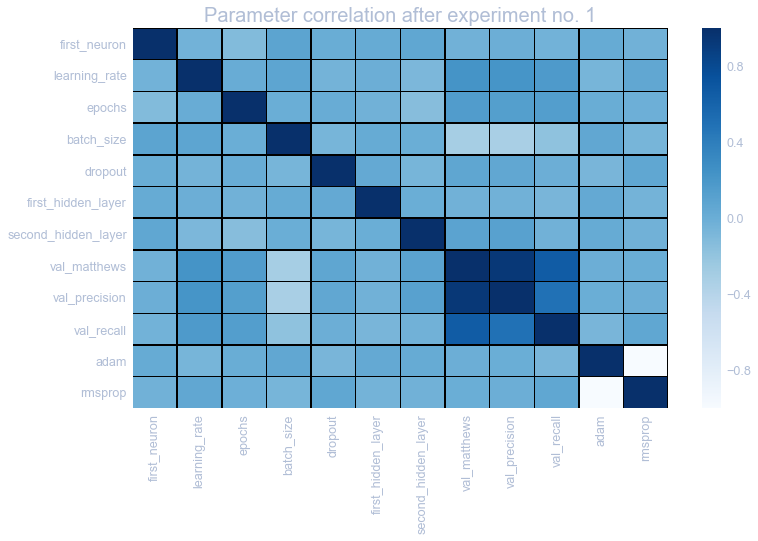

In [186]:
""" correlation matrix between parameters """

plt.figure(figsize=(12, 7))

param_list = list(params.keys())
param_list.remove("optimizer")
cols = param_list + ["val_matthews", "val_precision", "val_recall", "adam", "rmsprop"]
corr_mat_one = result[cols].corr()

sn.heatmap(corr_mat_one, cmap="Blues", linewidth=0.5, linecolor="black")
plt.title("Parameter correlation after experiment no. 1", fontsize=20)
plt.ylim([12, 0])

# print correlation between validation matthews score and parameters
print(corr_mat_one["val_matthews"])


We see that the learning rate and the number of epochs has the largest positive correlation with the MCC score, while the batch size has the largest negative correlation. This means we should look for more larger values of the learning rate and number of epochs, while decreasing the bath size.

Text(0, 0.5, 'Train loss')

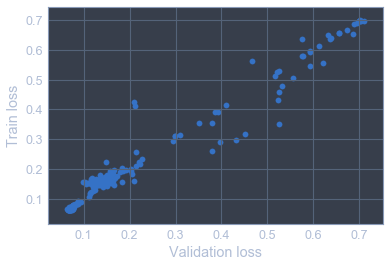

In [43]:
""" are we overfitting? """

plt.scatter(result["val_loss"], result["loss"])
plt.xlabel("Validation loss")
plt.ylabel("Train loss")

In [172]:
""" study optimizers and kernel initializers """

adam, rmsprop = [str(x) for x in result["optimizer"].unique()]

adam_50epochs = []
adam_200epochs = []

rmsprop_50epochs = []
rmsprop_200epochs = []

optimizers = result[["val_matthews", "epochs", "optimizer"]]
for row1 in optimizers.itertuples():

    if row1[2] == 50:
        if str(row1[-1]) == adam:
            adam_50epochs.append(row1[1])
        elif str(row1[-1]) == rmsprop:
            rmsprop_50epochs.append(row1[1])
    elif row1[2] == 200:
        if str(row1[-1]) == adam:
            adam_200epochs.append(row1[1])
        elif str(row1[-1]) == rmsprop:
            rmsprop_200epochs.append(row1[1])

optimizers["optimizer"] = optimizers["optimizer"].map({optimizers["optimizer"].unique()[0]: adam, optimizers["optimizer"].unique()[1]: rmsprop})

optimizers["adam"] = [1 if x == adam else 0 for x in optimizers["optimizer"]]
optimizers["rmsprop"] = [1 if x == rmsprop else 0 for x in optimizers["optimizer"]]
optimizers = optimizers.drop(["optimizer"], axis=1)


Both the validation loss and training loss are clustered close to zero, indicating that we are not overfitting the model

#### 2nd Experiment

- Increase learning rate range
- Decrease maximum epochs
- Decrease batch size
- Increase dropout
- Keep only "he_normal" kernel intializer
- Increase second hidden layer neurons
- Keep same activation functions
- Use only Adam

In [10]:
params2 = {"first_neuron": [2, 4, 8],
          "learning_rate": [1, 5, 10, 100],
          "epochs": [50, 100, 200],
          "batch_size": [16, 32, 64, 128],
          "dropout": [0.2, 0.4],
          "kernel_initializer": ["he_normal"],
          "first_hidden_layer": [2, 4],
          "second_hidden_layer": [6, 8],
          "activation": ["relu", "elu"],
          "class_weight": [None, class_weights],
          "optimizer": [Adam],
          }

scan_result = talos.Scan(Xtrain, Ytrain, model=find_best_neuralnet, params=params2, fraction_limit=0.1, experiment_name="2")
file = open("exp_2_scan_new.obj", "wb")
pickle.dump(scan_result, file)

result_df = scan_result.data
result_df.to_csv("exp_2_scan.csv")

'scan_result = talos.Scan(Xtrain, Ytrain, model=find_best_neuralnet, params=params2, fraction_limit=0.1, experiment_name="2")\nfile = open("exp_2_scan_new.obj", "wb")\npickle.dump(scan_result, file)\n\nresult_df = scan_result.data\nresult_df.to_csv("exp_2_scan.csv")'

In [25]:
result_df = pd.read_csv("exp_2_scan.csv")
result_df = result_df.fillna(value=0)

In [26]:
result_df.sort_values(by="val_recall", ascending=False)

,Unnamed: 0,round_epochs,val_loss,val_matthews,val_precision,val_recall,loss,matthews,precision,recall,...,batch_size,class_weight,dropout,epochs,first_hidden_layer,first_neuron,kernel_initializer,learning_rate,optimizer,second_hidden_layer
11,11,50,0.859451,0.000539,0.094820,0.984127,0.717466,0.000158,0.042120,0.459184,...,32,"{0: 0.550402853804047, 1: 5.460036607687615}",0.2,50,2,8,he_normal,100,<class 'keras.optimizers.Adam'>,6
323,323,50,1.146271,0.000000,0.094788,0.984127,0.719324,0.000000,0.042985,0.462585,...,32,"{0: 0.550402853804047, 1: 5.460036607687615}",0.2,50,4,4,he_normal,100,<class 'keras.optimizers.Adam'>,6
392,392,100,0.752701,0.000000,0.094788,0.984127,0.704792,0.000000,0.048512,0.493197,...,32,"{0: 0.550402853804047, 1: 5.460036607687615}",0.2,100,4,8,he_normal,100,<class 'keras.optimizers.Adam'>,6
174,174,100,0.227485,0.675775,0.546569,0.938289,0.233521,0.738074,0.634470,0.931886,...,128,"{0: 0.550402853804047, 1: 5.460036607687615}",0.2,100,4,8,he_normal,100,<class 'keras.optimizers.Adam'>,8
358,358,50,0.181594,0.761897,0.671961,0.930638,0.145486,0.821978,0.767346,0.921250,...,128,"{0: 0.550402853804047, 1: 5.460036607687615}",0.2,50,4,8,he_normal,10,<class 'keras.optimizers.Adam'>,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,31,50,0.180051,0.000000,0.000000,0.000000,0.098249,0.787443,0.785884,0.834160,...,32,0,0.4,50,4,4,he_normal,100,<class 'keras.optimizers.Adam'>,8
136,136,50,0.314937,0.000000,0.000000,0.000000,1.207659,-0.000533,0.000340,0.003401,...,16,0,0.4,50,4,8,he_normal,100,<class 'keras.optimizers.Adam'>,8
244,244,100,0.675606,0.000000,0.000000,0.000000,0.696808,0.000000,0.045599,0.384354,...,16,"{0: 0.550402853804047, 1: 5.460036607687615}",0.2,100,2,8,he_normal,100,<class 'keras.optimizers.Adam'>,8
246,246,100,0.615447,0.000000,0.000000,0.000000,0.714348,0.000000,0.042411,0.455782,...,32,"{0: 0.550402853804047, 1: 5.460036607687615}",0.4,100,4,2,he_normal,100,<class 'keras.optimizers.Adam'>,6


Text(0, 0.5, 'Training Matthews')

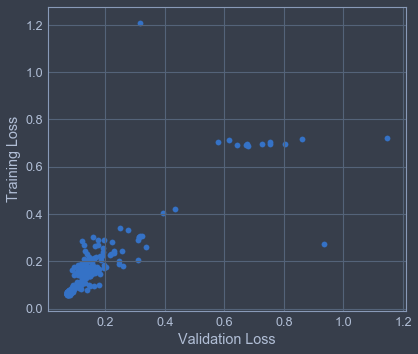

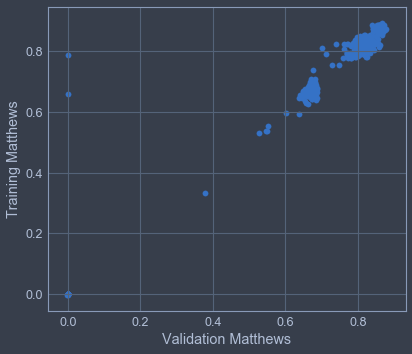

In [44]:
""" overfitting? """

plt.scatter(result_df["val_loss"], result_df["loss"])
plt.xlabel("Validation Loss")
plt.ylabel("Training Loss")

plt.figure()
plt.scatter(result_df["val_matthews"], result_df["matthews"])
plt.xlabel("Validation Matthews")
plt.ylabel("Training Matthews")

We still see clustering around 0 for the loss and 1 for the score, so we can conclude that we are not overfitting.

(10, 0)

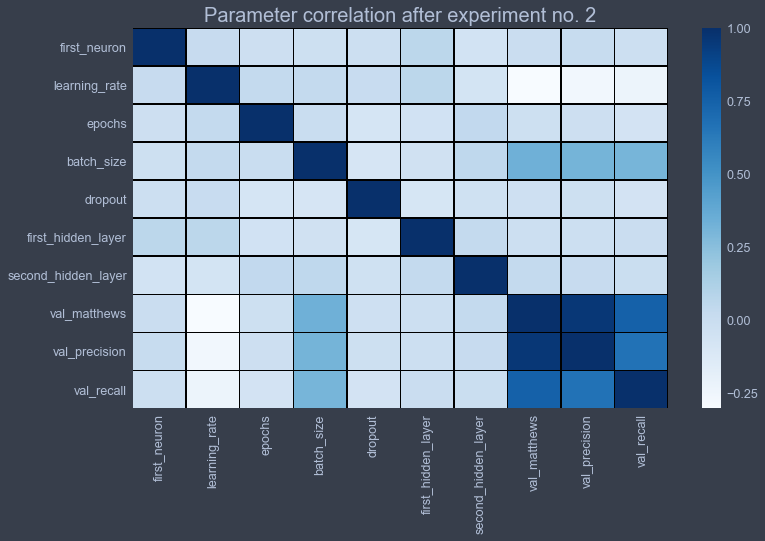

In [17]:
""" parameter correlation """

plt.figure(figsize=(12, 7))

param_list = list(params2.keys())

cols = param_list + ["val_matthews", "val_precision", "val_recall"]
corr_mat_two = result_df[cols].corr()

sn.heatmap(corr_mat_two, cmap="Blues", linewidth=0.5, linecolor="black")
plt.title("Parameter correlation after experiment no. 2", fontsize=20)
plt.ylim([10, 0])

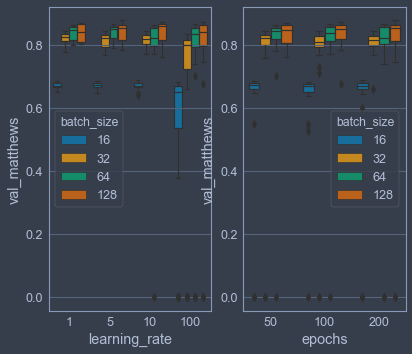

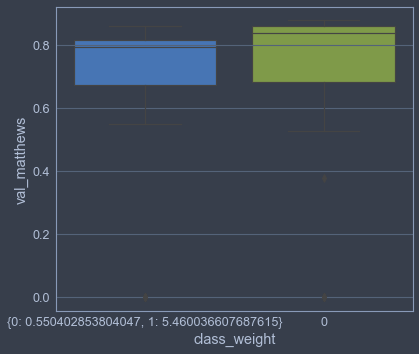

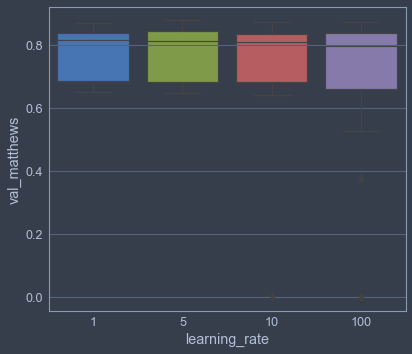

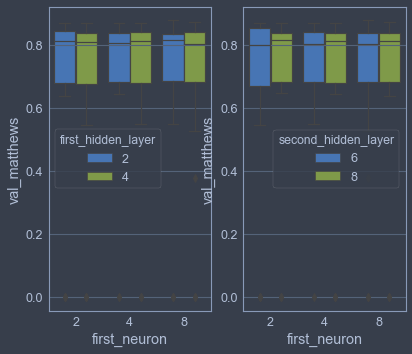

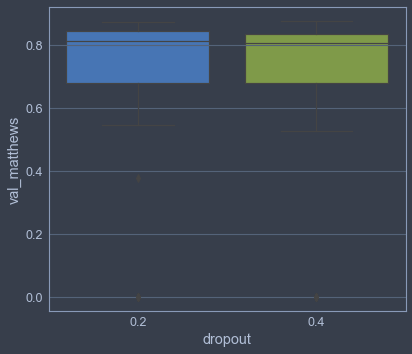

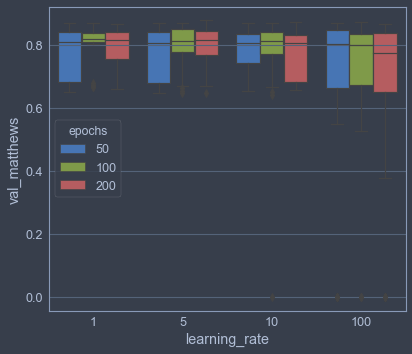

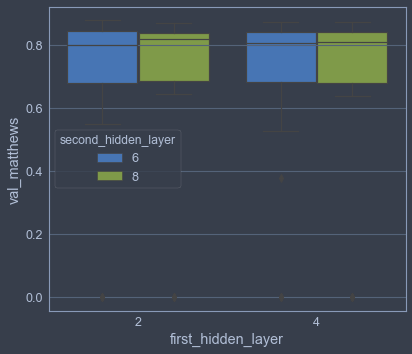

In [50]:
""" boxplots """

plt.subplot(121)
sn.boxplot(y='val_matthews', x='learning_rate', 
                 data=result_df, 
                 palette="colorblind",
                 hue='batch_size')
plt.subplot(122)
sn.boxplot(y='val_matthews', x='epochs', 
                 data=result_df, 
                 palette="colorblind",
                 hue='batch_size')

plt.figure()
sn.boxplot(y="val_matthews", x="class_weight", data=result_df)

plt.figure()
sn.boxplot(y="val_matthews", x="learning_rate", data=result_df)

plt.figure()
sn.boxplot(y="val_matthews", x="activation", data=result_df)

plt.subplot(121)
sn.boxplot(y="val_matthews", x="first_neuron", data=result_df, hue="first_hidden_layer")

plt.subplot(122)
sn.boxplot(y="val_matthews", x="first_neuron", data=result_df, hue="second_hidden_layer")

plt.figure()
sn.boxplot(y="val_matthews", x="dropout", data=result_df)

plt.figure()
sn.boxplot(y="val_matthews", x="learning_rate", data=result_df, hue="epochs")

plt.figure()
sn.boxplot(y="val_matthews", x="first_hidden_layer", data=result_df, hue="second_hidden_layer")


#### Experiment 3

- Drop batch size 16, 32 and 64, add higher values
- Drop class_weight
- Reduce learning rate
- Use elu
- Just use 8 input neurons?
- Use smaller dropout (0.2)?
- Drop 50 epochs, use 100?
- Use 2 and 8 hidden neurons

In [11]:
params3 = {"first_neuron": [8],
          "learning_rate": [0.01, 0.1, 0.5, 1, 1.5, 2, 3],
          "epochs": [100, 150, 200],
          "batch_size": [128, 192, 256],
          "dropout": [0.1, 0.05, 0.2],
          "kernel_initializer": ["he_normal"],
          "first_hidden_layer": [2],
          "second_hidden_layer": [8],
          "activation": ["elu"],
          "class_weight": [None],
          "optimizer": [Adam],
          }

scan_result = talos.Scan(Xtrain, Ytrain, model=find_best_neuralnet, params=params3, fraction_limit=0.1, experiment_name="3")
file = open("exp_3_scan_new.obj", "wb")
pickle.dump(scan_result, file)

result_df = scan_result.data
result_df.to_csv("exp_3_scan.csv")

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:04<00:00, 10.22s/it]


In [10]:
result_df = pd.read_csv("exp_3_scan.csv")
result_df.sort_values(by="val_recall", ascending=False)

,Unnamed: 0,round_epochs,val_loss,val_matthews,val_precision,val_recall,loss,matthews,precision,recall,...,batch_size,class_weight,dropout,epochs,first_hidden_layer,first_neuron,kernel_initializer,learning_rate,optimizer,second_hidden_layer
14,14,100,0.065521,0.881377,0.915027,0.872000,0.063898,0.878056,0.920657,0.862001,...,128,NaN,0.20,100,2,8,he_normal,3.00,<class 'keras.optimizers.Adam'>,8
7,7,150,0.064605,0.884658,0.924142,0.868466,0.066837,0.869455,0.907954,0.858218,...,128,NaN,0.20,150,2,8,he_normal,1.50,<class 'keras.optimizers.Adam'>,8
6,6,100,0.063538,0.886525,0.932935,0.861707,0.069410,0.867258,0.918228,0.843046,...,256,NaN,0.10,100,2,8,he_normal,1.00,<class 'keras.optimizers.Adam'>,8
16,16,200,0.444178,0.745299,0.689859,0.860869,0.442496,0.743571,0.694837,0.854845,...,192,NaN,0.10,200,2,8,he_normal,0.01,<class 'keras.optimizers.Adam'>,8
1,1,200,0.069286,0.872345,0.910444,0.858786,0.072659,0.861010,0.902842,0.846897,...,256,NaN,0.05,200,2,8,he_normal,0.10,<class 'keras.optimizers.Adam'>,8
2,2,150,0.066434,0.876612,0.919683,0.857701,0.067551,0.878211,0.930423,0.853671,...,128,NaN,0.20,150,2,8,he_normal,0.50,<class 'keras.optimizers.Adam'>,8
8,8,150,0.064913,0.881973,0.931787,0.857094,0.068627,0.864647,0.914941,0.842767,...,128,NaN,0.05,150,2,8,he_normal,0.50,<class 'keras.optimizers.Adam'>,8
0,0,150,0.064763,0.886395,0.941779,0.855038,0.065374,0.872972,0.914405,0.860142,...,128,NaN,0.05,150,2,8,he_normal,1.00,<class 'keras.optimizers.Adam'>,8
4,4,100,0.065567,0.883224,0.937888,0.854253,0.065529,0.875862,0.919103,0.860599,...,128,NaN,0.10,100,2,8,he_normal,1.50,<class 'keras.optimizers.Adam'>,8
3,3,150,0.065483,0.883519,0.938375,0.853819,0.064656,0.880106,0.920146,0.865985,...,128,NaN,0.10,150,2,8,he_normal,2.00,<class 'keras.optimizers.Adam'>,8


In [31]:
result_df = result_df[result_df["learning_rate"] != 0.01] # drop the 0.01 learning rate as this produced really bad results
result_df = result_df[result_df["epochs"] != 200]

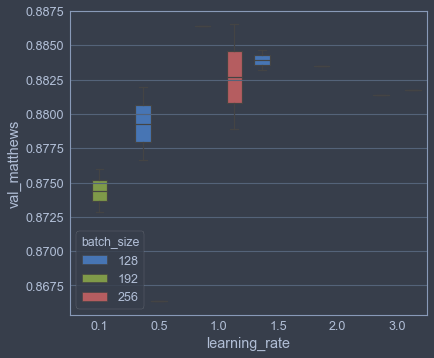

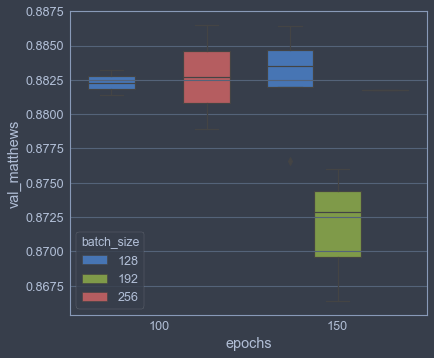

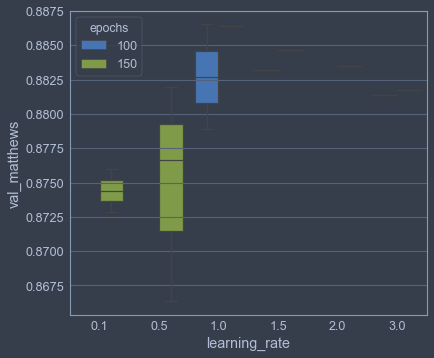

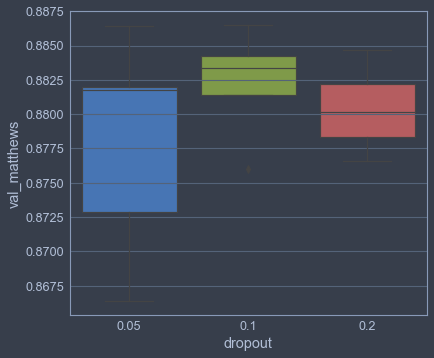

In [34]:
plt.figure()
sn.boxplot(y='val_matthews', x='learning_rate', 
                 data=result_df, 
                 hue='batch_size')
plt.figure()
sn.boxplot(y='val_matthews', x='epochs', 
                 data=result_df, 
                 hue='batch_size')


plt.figure()
sn.boxplot(y="val_matthews", x="learning_rate", hue="epochs", data=result_df)

plt.figure()
sn.boxplot(y="val_matthews", x="dropout", data=result_df)

In [ ]:
"""
best:
- 150 epochs
- 128 batch size
- 1.0 learning rate
- 0.1 dropout
"""

### Final Neural Network

In [36]:
from keras.activations import elu
params_final = {"first_neuron": [8],
          "learning_rate": [1],
          "epochs": [150],
          "batch_size": [128],
          "dropout": [0.1],
          "kernel_initializer": ["he_normal"],
          "first_hidden_layer": [2],
          "second_hidden_layer": [8],
          "activation": [elu],
          "class_weight": [None],
          "optimizer": [Adam],
          }

def make_best_nn(params):

    """ Initialize a neural network based on the best parameters found """

    
    model = Sequential() # initialize network
    
    # inout layer
    model.add(Dense(8, input_dim=Xtrain.shape[1],
                    activation="elu",
                    kernel_initializer="he_normal"))
    
    # add first hidden layers
    model.add(Dense(2,
                    activation="elu",
                    kernel_initializer="he_normal"))
    # add second hidden layers    
    model.add(Dense(8,
                    activation="elu",
                    kernel_initializer="he_normal"))
    # output layer
    model.add(Dense(1, activation="sigmoid",
                    kernel_initializer="he_normal"))
    # train model
    model.compile(loss="binary_crossentropy",
                  optimizer="Adam",
                  metrics=None)
    
    model.fit(Xtrain, Ytrain,
                batch_size=128,
                epochs=150,
                class_weight=None,
                verbose=0)
    
    
    return model 

neuralnet = make_best_nn(params_final)

In [37]:
""" save best models """
import pickle

for model in best_models:
    file = open(model + ".obj", "wb") 
    pickle.dump(best_models[model], file)
    
file = open("NeuralNet.obj", "wb")
pickle.dump(neuralnet, file)

# Bringing It All Together: Analysis of All Models

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
""" load best models """
import pickle

best_models = {"LogReg": (), "RFC": (), "KNN": (), "SVM": (), "NeuralNet": ()}
for model in best_models:
    filename = model + ".obj"
    filehandler = open(filename, 'rb') 
    best_models[model] = pickle.load(filehandler)

Using TensorFlow backend.


## Confusion Matrix and Classification Report

Classification report for LogReg: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4066
           1       0.96      0.81      0.88       409

    accuracy                           0.98      4475
   macro avg       0.97      0.90      0.93      4475
weighted avg       0.98      0.98      0.98      4475

Classification report for RFC: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4066
           1       0.94      0.84      0.89       409

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475

Classification report for KNN: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4066
           1       0.97      0.78      0.86       409

    accuracy                           0.98      4475
   macro avg       0.97   

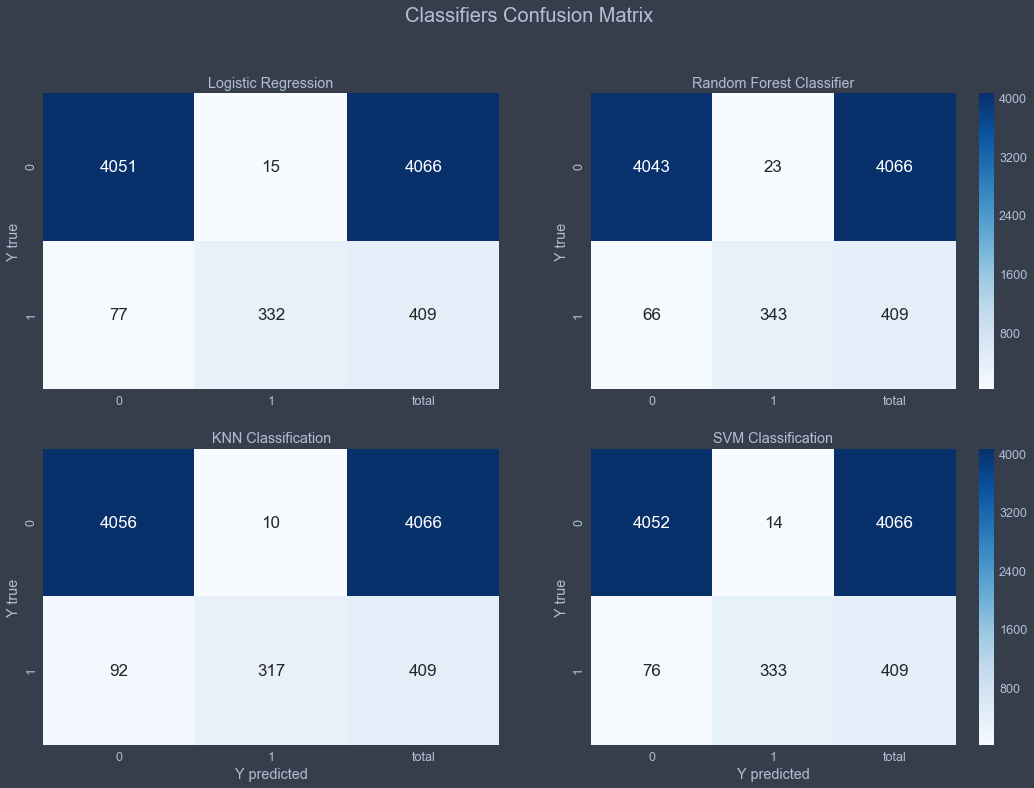

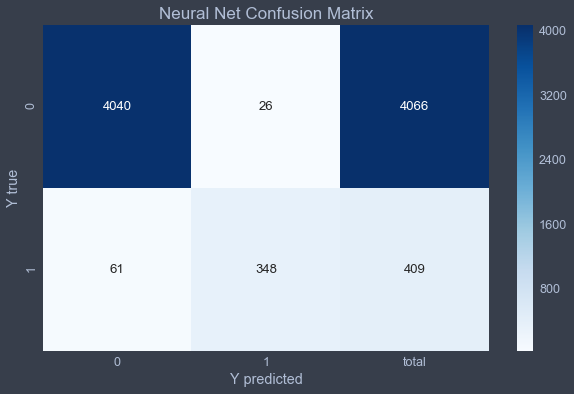

In [48]:
cms = []
crs = []
for model in best_models:
    algo = best_models[model]
    
    if model == "NeuralNet":
        preds = algo.predict(Xtest) # predictions
        preds[preds < 0.5] = 0
        preds[preds >= 0.5] = 1
    else:
        preds = algo.predict(Xtest) # predictions
    
    cm = confusion_matrix(Ytest, preds) # confusion matrix
    # cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    cm = pd.DataFrame(cm) 
    
    cms.append(cm)
    
    cr = classification_report(Ytest, preds) # classification report
    cr_dict = classification_report(Ytest, preds, output_dict=True)
    cr_dict.to_csv("results/")

    cm["total"] = cm[0] + cm[1]
    print(f"Classification report for {model}: \n", cr)
    
    
""" plot confusion matrix """
annot_kws={'fontsize':17}
f, axes = plt.subplots(2, 2,figsize=(18,12))
p1 = sn.heatmap(cms[0],annot=True, annot_kws=annot_kws, fmt="d",cmap="Blues", cbar=False,ax=axes[0,0])
p1.set_ylabel("Y true")
#p1.set_xlabel("Y predicted")
p1.set_title("Logistic Regression")
p1.set_ylim([2, 0])
p2 = sn.heatmap(cms[1],annot=True, annot_kws=annot_kws, fmt="d",cmap="Blues",ax=axes[0,1])
p2.set_ylabel("Y true")
#p2.set_xlabel("Y predicted")
p2.set_title("Random Forest Classifier")
p2.set_ylim([2, 0])
p3 = sn.heatmap(cms[2],annot=True, annot_kws=annot_kws, fmt="d",cmap="Blues",cbar=False,ax=axes[1,0])
p3.set_ylabel("Y true")
p3.set_xlabel("Y predicted")
p3.set_title("KNN Classification")
p3.set_ylim([2, 0])
p4 = sn.heatmap(cms[3],annot=True, annot_kws=annot_kws, fmt="d",cmap="Blues",ax=axes[1,1])
p4.set_ylabel("Y true")
p4.set_xlabel("Y predicted")
p4.set_title("SVM Classification")
p4.set_ylim([2, 0])


plt.suptitle("Classifiers Confusion Matrix", fontsize=20)
plt.savefig("figures/confusion_matrix.png", dpi=300)

""" Neural Network confusion matrix """
plt.figure(figsize=(10, 6))
sn.heatmap(cms[-1], annot=True, cmap="Blues", fmt="d")
plt.title("Neural Net Confusion Matrix", fontsize=17)
plt.xlabel("Y predicted")
plt.ylabel("Y true")
plt.ylim([2, 0])
plt.savefig("figures/nn_confusion_matrix", dpi=300)

## ROC curve and AUC score

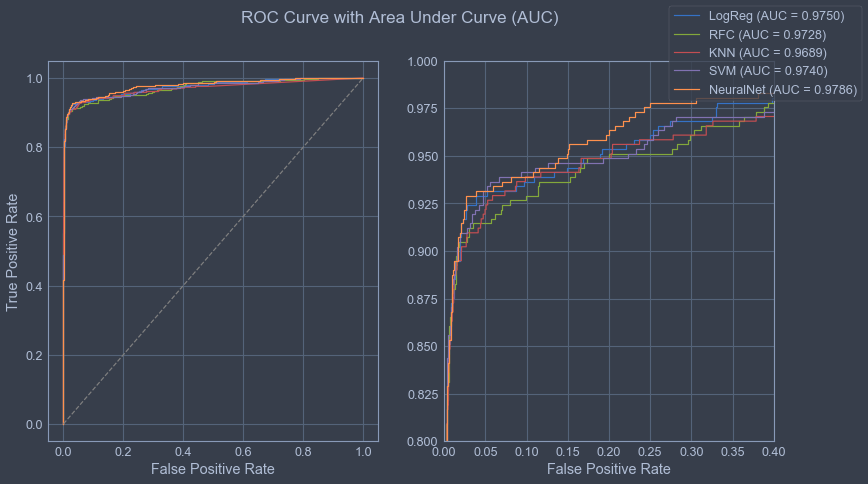

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))

for model in best_models:

    if model == "NeuralNet":
        Ypreds = best_models[model].predict_proba(Xtest)
    else:
        Ypreds = best_models[model].predict_proba(Xtest)[:,1]
        
    fpr, tpr, thresholds = roc_curve(Ytest, Ypreds)
    ax1.plot(fpr, tpr, label=f"{model} (AUC = {auc(fpr, tpr):.4f})")
    ax2.plot(fpr, tpr)

    
ax1.plot([0, 1], [0, 1], 'k--',color="grey")
ax2.plot([0, 1], [0, 1], 'k--',color="grey")
ax2.set_xlim([0, 0.4])
ax2.set_ylim([0.8, 1.0])

ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

ax2.set_xlabel('False Positive Rate')

fig.legend()
plt.suptitle("ROC Curve with Area Under Curve (AUC)", fontsize=17)
plt.savefig("figures/roc_auc.png", dpi=500)

In [9]:
""" get results from the best estimators """

"""mean_fit_time	std_fit_time	mean_score_time	std_score_time	param_metric	param_n_neighbors	
param_weights	params	split0_test_score	split1_test_score	split2_test_score	
split3_test_score	split4_test_score	mean_test_score	std_test_score	rank_test_score"""

# pandas.DataFrame( data, index, columns, dtype, copy)

columns_to_keep = ["mean_fit_time", "std_fit_time", "mean_test_score", "std_test_score"]
best = []

files = ["logreg", "randomforest", "knn", "svm"]

for f in files:
    filename = "results/" + f + ".csv"
    
    resultdf = pd.read_csv(open(filename, "r"))
    print(f"Number of model for {f}: {len(resultdf.index)}")
    bestresult = resultdf.loc[resultdf["rank_test_score"] == 1] # model with best score
    
    bestresult = bestresult[columns_to_keep]
    
    best.append(bestresult.values[0])
    

bestmodels = pd.DataFrame(data=best, index=files, columns=columns_to_keep)
#bestmodels.to_csv("results/best_models.csv")
bestmodels

Number of model for logreg: 360
Number of model for randomforest: 96
Number of model for knn: 608
Number of model for svm: 300


,mean_fit_time,std_fit_time,mean_test_score,std_test_score
logreg,0.322634,0.013683,0.976153,0.005088
randomforest,3.590640,0.113843,0.977751,0.003055
knn,0.008390,0.001022,0.970806,0.006108
svm,0.253990,0.005552,0.977378,0.001743


## Parameters from the best models

In [16]:
for model in best_models:
    if model == "NeuralNet":
        continue
    print(model)
    print("--------------")
    print(best_models[model].get_params())
    print()

LogReg
--------------
{'C': 1.389495494373136, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

RFC
--------------
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

KNN
--------------
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 109, 'p': 2, 'weights': 'distance'}

SVM
--------------
{'C': 10.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 

In [65]:
for name in files:
    time = bestmodels.loc[name, "mean_fit_time"]
    score = bestmodels.loc[name, "mean_test_score"]
    print(f"{name} | training time: {time:.3f} | score: {score:.3f} | score/time: {score/time :.3f}")

logreg | training time: 0.323 | score: 0.976 | score/time: 3.026
randomforest | training time: 3.591 | score: 0.978 | score/time: 0.272
knn | training time: 0.008 | score: 0.971 | score/time: 115.711
svm | training time: 0.254 | score: 0.977 | score/time: 3.848


## Varying the threshold

In [9]:
threshold = np.arange(0.1, 1.0, 0.1)

neuralnet = best_models["NeuralNet"]

                 precision    recall  f1-score   support

Non-pulsar Star       0.99      0.98      0.98      4066
    Pulsar Star       0.79      0.92      0.85       409

       accuracy                           0.97      4475
      macro avg       0.89      0.95      0.92      4475
   weighted avg       0.97      0.97      0.97      4475

                 precision    recall  f1-score   support

Non-pulsar Star       0.99      0.99      0.99      4066
    Pulsar Star       0.88      0.89      0.89       409

       accuracy                           0.98      4475
      macro avg       0.93      0.94      0.94      4475
   weighted avg       0.98      0.98      0.98      4475

                 precision    recall  f1-score   support

Non-pulsar Star       0.99      0.99      0.99      4066
    Pulsar Star       0.90      0.89      0.89       409

       accuracy                           0.98      4475
      macro avg       0.94      0.94      0.94      4475
   weighted avg       0

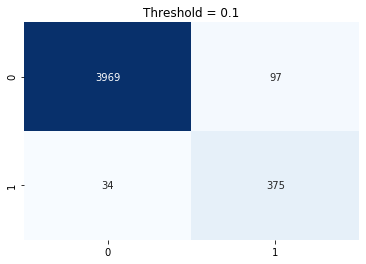

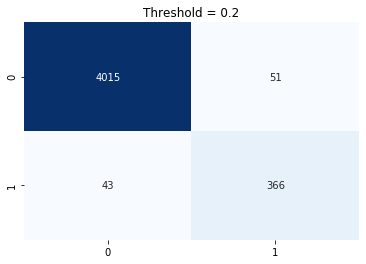

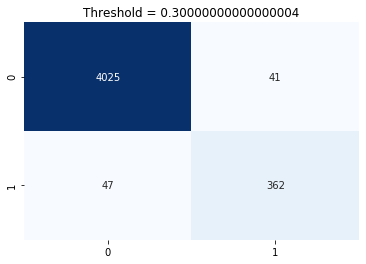

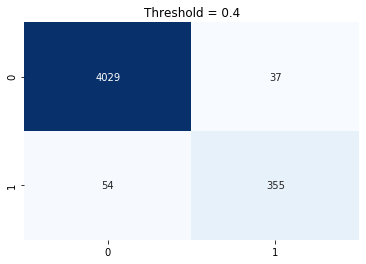

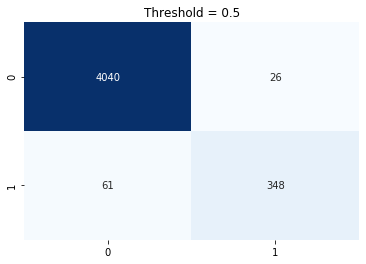

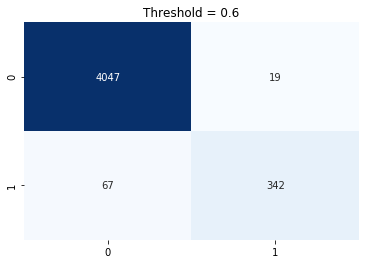

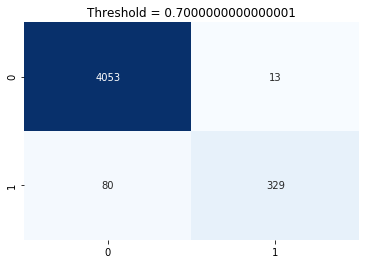

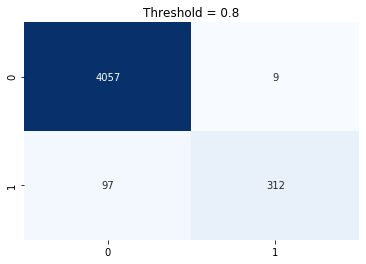

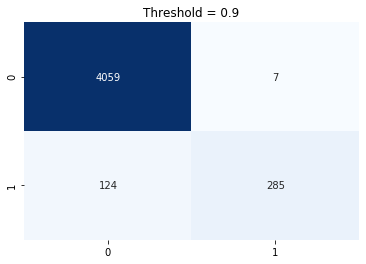

In [17]:
for t in threshold:
    predictions = neuralnet.predict(Xtest, batch_size=128)

    predictions[predictions < t] = 0
    predictions[predictions >= t] = 1

    print(classification_report(Ytest, predictions, 
                                   target_names=['Non-pulsar Star', 'Pulsar Star']))

    plt.figure()
    sn.heatmap(confusion_matrix(Ytest, predictions),annot=True,  fmt="d",cmap="Blues", cbar=False)
    plt.ylim([2, 0])
    plt.title(f"Threshold = {t}")